In [1]:
#!pip install Jinja2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
df = pd.read_csv("../../data/preprocessed/fernwarme_weather.csv",delimiter=',',encoding='UTF-8')

In [4]:
def timestamp_to_datetime(timestamp):
    date_str = timestamp.split(' ')[0]
    time_str = timestamp.split(' ')[1]
    datetime_obj = datetime.datetime(int(date_str.split('-')[0]), int(date_str.split('-')[1] ), int(date_str.split('-')[2]),int(time_str[:2]), int(time_str[3:4]))
    return datetime_obj
    

In [5]:
df['timestamp'] = df['timestamp'].apply(timestamp_to_datetime)

In [6]:
df['day'] = [x.day for x in df['timestamp']]
df['month'] = [x.month for x in df['timestamp']]
df['year'] = [x.year for x in df['timestamp']]
df['hour'] = [x.hour for x in df['timestamp']]
#minute not imp if we're sampling hourly
#df['minute'] = [x.minute for x in df['timestamp']] 

### Considering only electricity usage as energy type

In [7]:
df = df[['timestamp', 'district_heating','Graz Temperature [2 m elevation corrected]',
       'Graz Shortwave Radiation', 'Graz Direct Shortwave Radiation',
       'Graz Diffuse Shortwave Radiation', 'Graz Relative Humidity [2 m]',
       'is_schoolday', 'day', 'month', 'year', 'hour']]

In [8]:
df

,timestamp,district_heating,Graz Temperature [2 m elevation corrected],Graz Shortwave Radiation,Graz Direct Shortwave Radiation,Graz Diffuse Shortwave Radiation,Graz Relative Humidity [2 m],is_schoolday,day,month,year,hour
0,2021-06-14 00:01:00,3.29,4.32137,0.0,0.0,0.0,73.00,1,14,6,2021,0
1,2021-06-14 00:03:00,3.28,4.30637,0.0,0.0,0.0,71.00,1,14,6,2021,0
2,2021-06-14 00:04:00,3.25,4.29137,0.0,0.0,0.0,69.00,1,14,6,2021,0
3,2021-06-14 01:00:00,3.23,4.27637,0.0,0.0,0.0,67.00,1,14,6,2021,1
4,2021-06-14 01:01:00,3.26,4.26137,0.0,0.0,0.0,65.00,1,14,6,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19291,2021-12-31 23:00:00,0.99,23.30137,0.0,0.0,0.0,62.00,0,31,12,2021,23
19292,2021-12-31 23:01:00,0.98,22.88137,0.0,0.0,0.0,64.00,0,31,12,2021,23
19293,2021-12-31 23:03:00,0.95,22.68637,0.0,0.0,0.0,64.75,0,31,12,2021,23
19294,2021-12-31 23:04:00,0.95,22.49137,0.0,0.0,0.0,65.50,0,31,12,2021,23


In [9]:
df.corr().style.background_gradient(cmap='coolwarm')

/tmp/ipykernel_25694/543879950.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap='coolwarm')


,district_heating,Graz Temperature [2 m elevation corrected],Graz Shortwave Radiation,Graz Direct Shortwave Radiation,Graz Diffuse Shortwave Radiation,Graz Relative Humidity [2 m],is_schoolday,day,month,year,hour
district_heating,1.000000,0.159198,0.003694,-0.009830,0.027403,0.008853,0.409645,-0.066619,0.192596,-0.003540,-0.253472
Graz Temperature [2 m elevation corrected],0.159198,1.000000,0.446720,0.419579,0.454184,-0.529011,0.342954,0.054214,0.807753,0.008391,0.162794
Graz Shortwave Radiation,0.003694,0.446720,1.000000,0.981758,0.941113,-0.625570,0.025589,-0.011487,0.271033,-0.005498,0.207513
Graz Direct Shortwave Radiation,-0.009830,0.419579,0.981758,1.000000,0.859662,-0.611332,0.008623,-0.011322,0.248287,-0.004955,0.186689
Graz Diffuse Shortwave Radiation,0.027403,0.454184,0.941113,0.859662,1.000000,-0.593757,0.053421,-0.010733,0.286726,-0.005963,0.225590
Graz Relative Humidity [2 m],0.008853,-0.529011,-0.625570,-0.611332,-0.593757,1.000000,-0.070492,0.104004,-0.381017,0.000644,-0.312774
is_schoolday,0.409645,0.342954,0.025589,0.008623,0.053421,-0.070492,1.000000,-0.082920,0.192214,-0.006352,0.000174
day,-0.066619,0.054214,-0.011487,-0.011322,-0.010733,0.104004,-0.082920,1.000000,-0.103982,-0.012620,0.000128
month,0.192596,0.807753,0.271033,0.248287,0.286726,-0.381017,0.192214,-0.103982,1.000000,-0.030958,0.000226
year,-0.003540,0.008391,-0.005498,-0.004955,-0.005963,0.000644,-0.006352,-0.012620,-0.030958,1.000000,-0.011960


In [10]:
X = df[['Graz Temperature [2 m elevation corrected]',
       'Graz Shortwave Radiation', 'Graz Direct Shortwave Radiation',
       'Graz Diffuse Shortwave Radiation', 'Graz Relative Humidity [2 m]',
       'is_schoolday', 'day', 'month', 'hour']]
Y = df['district_heating']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Fitting district_heating DTR model

### Decision Tree Regressor

In [12]:
DecTreeReg= DecisionTreeRegressor()
DecTreeReg.fit(X_train, y_train)

DecisionTreeRegressor()

In [13]:
DTRPred=DecTreeReg.predict(X_test)

Evaluation

In [14]:
mse = (np.sqrt(mean_squared_error(y_test, DTRPred)))
r2= r2_score(y_test, DTRPred)
mae = mean_absolute_error(y_test, DTRPred)
print("Perfomance for test set {:.2f}".format(r2))

Perfomance for test set 0.87


<Figure size 640x480 with 0 Axes>

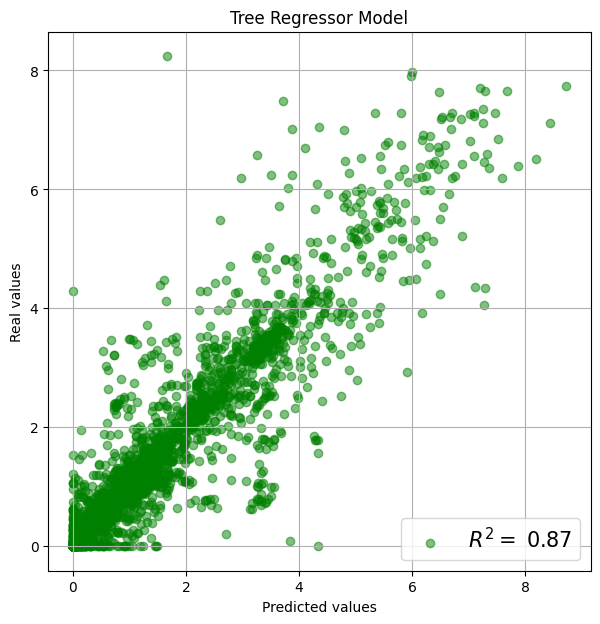

In [15]:
plt.figure()
plt.figure(figsize=(7, 7))
plt.grid()
plt.scatter(y_test,DTRPred,alpha=0.5
        ,color='green',label=r'$R^2 = $ {:.2f}'.format(r2))
plt.title("Tree Regressor Model")
plt.ylabel("Real values")
plt.xlabel("Predicted values")
plt.legend(prop={'size': 15})
plt.show()

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
district_heating,19296.0,1.682925,1.490755,0.00000,0.74000,1.130000,2.990000,8.72000
Graz Temperature [2 m elevation corrected],19296.0,11.829232,8.980778,-8.69863,3.69137,12.771369,19.481371,31.26137
Graz Shortwave Radiation,19296.0,183.010123,239.627666,0.00000,0.00000,40.717500,327.520000,901.57000
Graz Direct Shortwave Radiation,19296.0,109.140291,158.586891,-6.14830,0.00000,9.885448,185.670963,612.54310
Graz Diffuse Shortwave Radiation,19296.0,73.869830,89.185585,0.00000,0.00000,19.613374,146.926073,301.07526
Graz Relative Humidity [2 m],19296.0,64.895056,15.147880,28.00000,53.50000,64.000000,76.000000,98.00000
is_schoolday,19296.0,0.437759,0.496124,0.00000,0.00000,0.000000,1.000000,1.00000
day,19296.0,16.357535,8.760894,1.00000,9.00000,17.000000,24.000000,31.00000
month,19296.0,9.198746,1.906615,1.00000,8.00000,9.000000,11.000000,12.00000
year,19296.0,2021.000052,0.007199,2021.00000,2021.00000,2021.000000,2021.000000,2022.00000


In [17]:
test_df = X_test
test_df['fernwarme_pred'] = DTRPred
test_df['fernwarme__real'] = y_test

In [18]:
test_df

,Graz Temperature [2 m elevation corrected],Graz Shortwave Radiation,Graz Direct Shortwave Radiation,Graz Diffuse Shortwave Radiation,Graz Relative Humidity [2 m],is_schoolday,day,month,hour,fernwarme_pred,fernwarme__real
200,2.661370,0.000000,0.000000,0.000000,57.00,1,16,6,2,0.78,0.77
1355,-1.651130,0.000000,0.000000,0.000000,88.75,1,28,6,3,3.68,3.66
7596,-1.388630,0.000000,0.000000,0.000000,48.00,0,1,9,3,3.37,3.36
8810,14.801369,238.075000,134.195622,103.879378,38.50,1,13,9,18,1.35,1.62
17448,20.231370,354.220000,307.824340,46.395657,51.00,0,12,12,18,1.11,1.11
...,...,...,...,...,...,...,...,...,...,...,...
16662,18.566371,886.884980,602.563730,284.321240,39.00,0,4,12,13,1.07,0.01
764,7.921370,0.000000,0.000000,0.000000,93.00,1,21,6,23,0.72,0.74
7668,-0.758630,0.000000,0.000000,0.000000,53.00,0,1,9,21,0.85,0.83
17407,14.166370,133.055000,55.357630,77.697369,57.50,0,12,12,8,1.13,1.28
